In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


In [4]:
# Define folder path for stock data
data_folder = "../../data/yfinance_data/yfinance_data"

# List of stock file names
stock_files = [
    "AAPL_historical_data.csv",
    "AMZN_historical_data.csv",
    "GOOG_historical_data.csv",
    "META_historical_data.csv",
    "MSFT_historical_data.csv",
    "NVDA_historical_data.csv",
    "TSLA_historical_data.csv",
]

# Create a dictionary with file paths for each stock
file_paths = {file.split("_")[0]: os.path.join(data_folder, file) for file in stock_files}


In [ ]:
# Dictionary to store cleaned data for each stock
stock_data = {}

# Load and clean stock data
for stock, path in file_paths.items():
    # Load data
    df = pd.read_csv(path)
    
    # Drop unnecessary columns
    if 'Dividends' in df.columns:
        df = df.drop(columns=['Dividends'])
    if 'Stock Splits' in df.columns:
        df = df.drop(columns=['Stock Splits'])
    
    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    
    # Store cleaned DataFrame
    stock_data[stock] = df


In [6]:
# Helper functions to calculate indicators
def calculate_sma(data, period):
    return data['Close'].rolling(window=period).mean()

def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def calculate_macd(data, short_period=12, long_period=26, signal_period=9):
    short_ema = data['Close'].ewm(span=short_period, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_period, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=signal_period, adjust=False).mean()
    return macd, signal


In [7]:
# Process and calculate indicators for each stock
for stock, path in file_paths.items():
    # Load data
    df = pd.read_csv(path)
    
    # Drop unnecessary columns
    if 'Dividends' in df.columns:
        df = df.drop(columns=['Dividends'])
    if 'Stock Splits' in df.columns:
        df = df.drop(columns=['Stock Splits'])
    
    # Ensure Date column is datetime
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')
    
    # Calculate indicators
    df['SMA_10'] = calculate_sma(df, 10)
    df['SMA_30'] = calculate_sma(df, 30)
    df['RSI'] = calculate_rsi(df)
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    
    # Store processed data
    stock_data[stock] = df


Visualizing data for AAPL


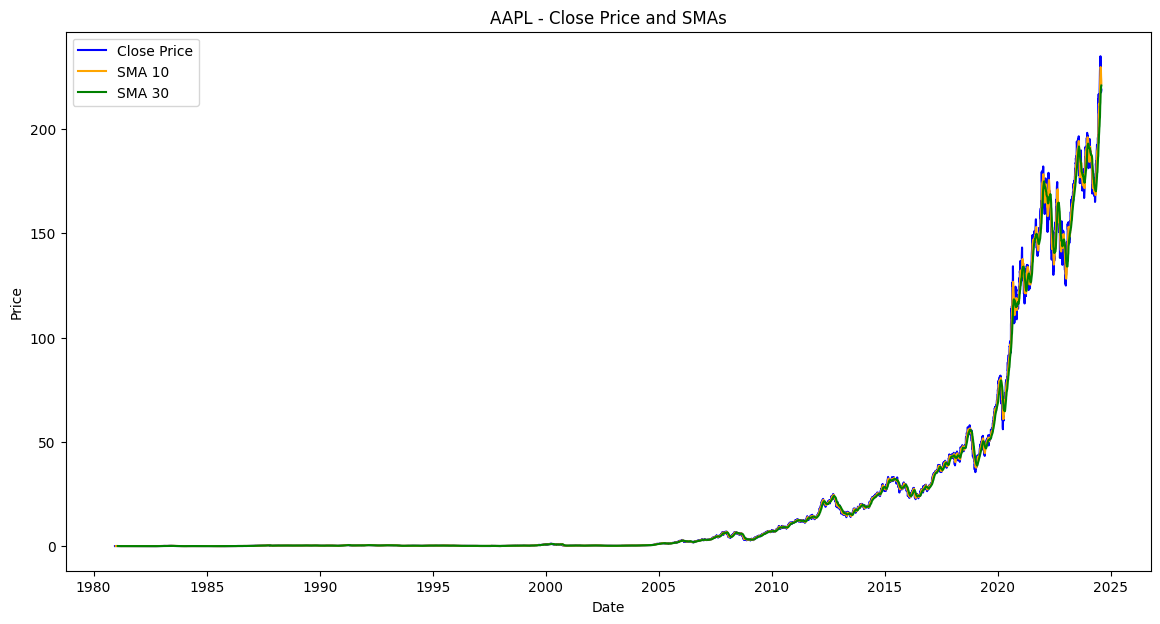

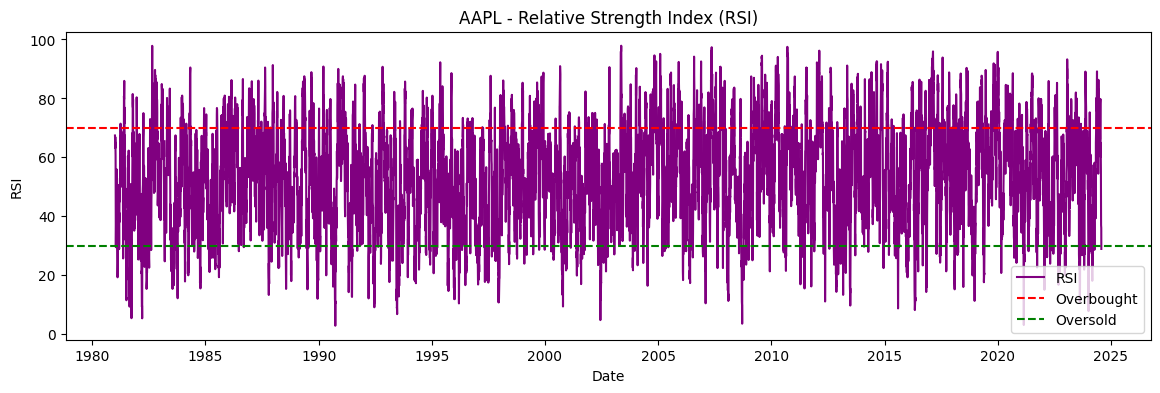

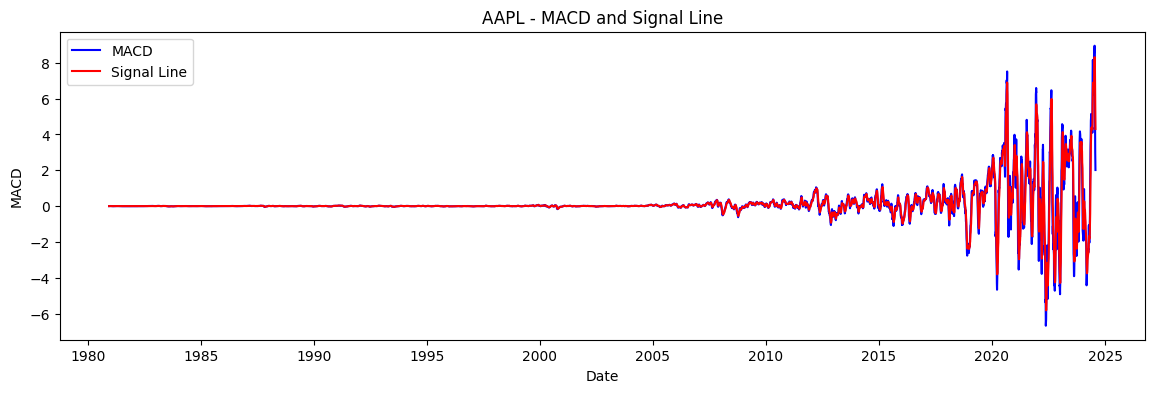

Visualizing data for AMZN


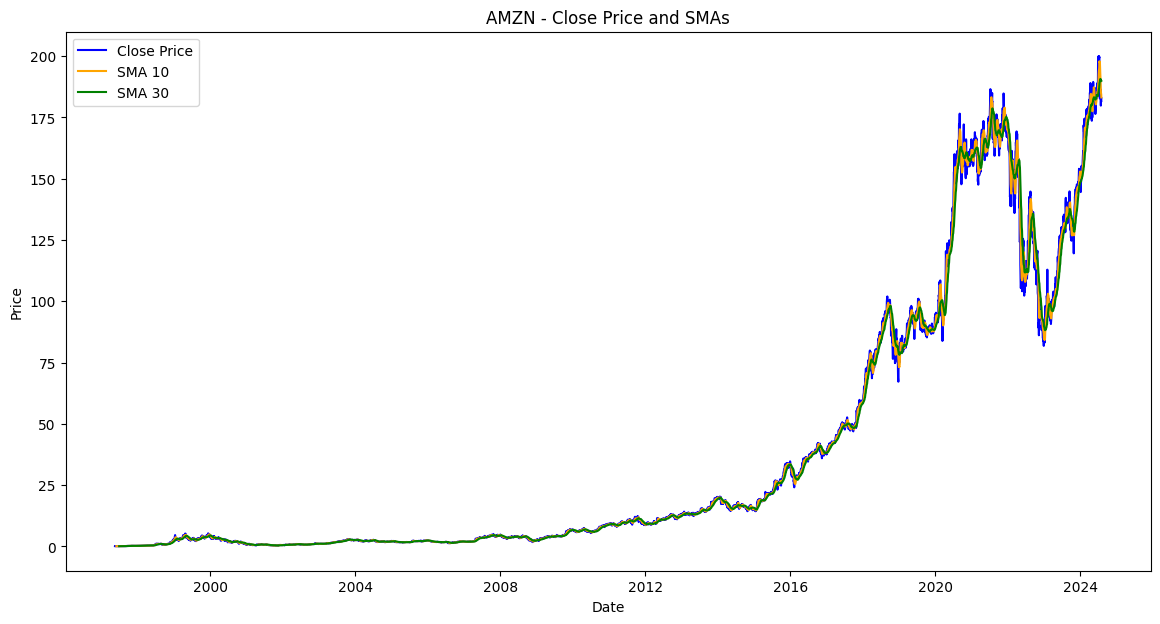

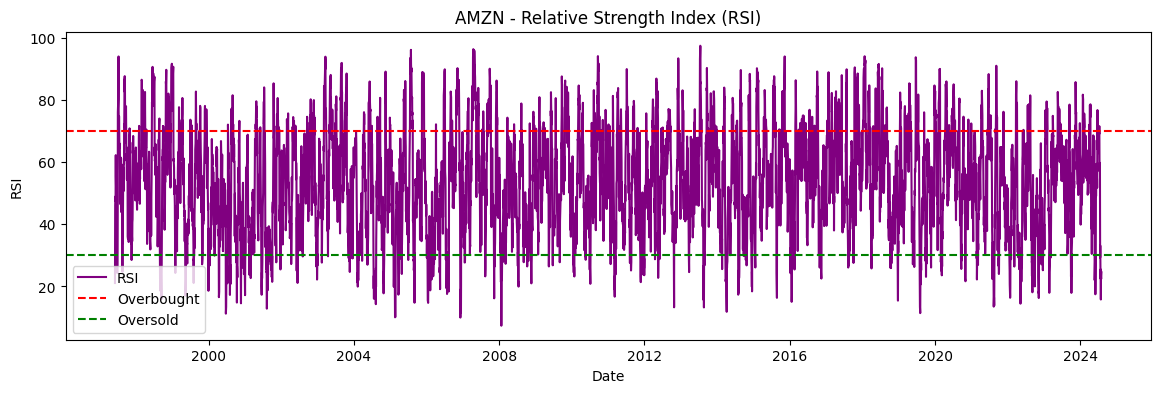

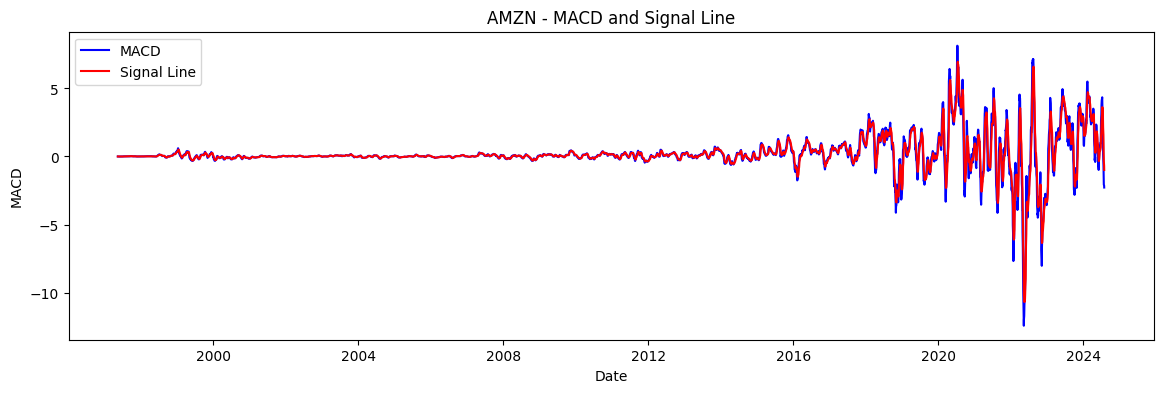

Visualizing data for GOOG


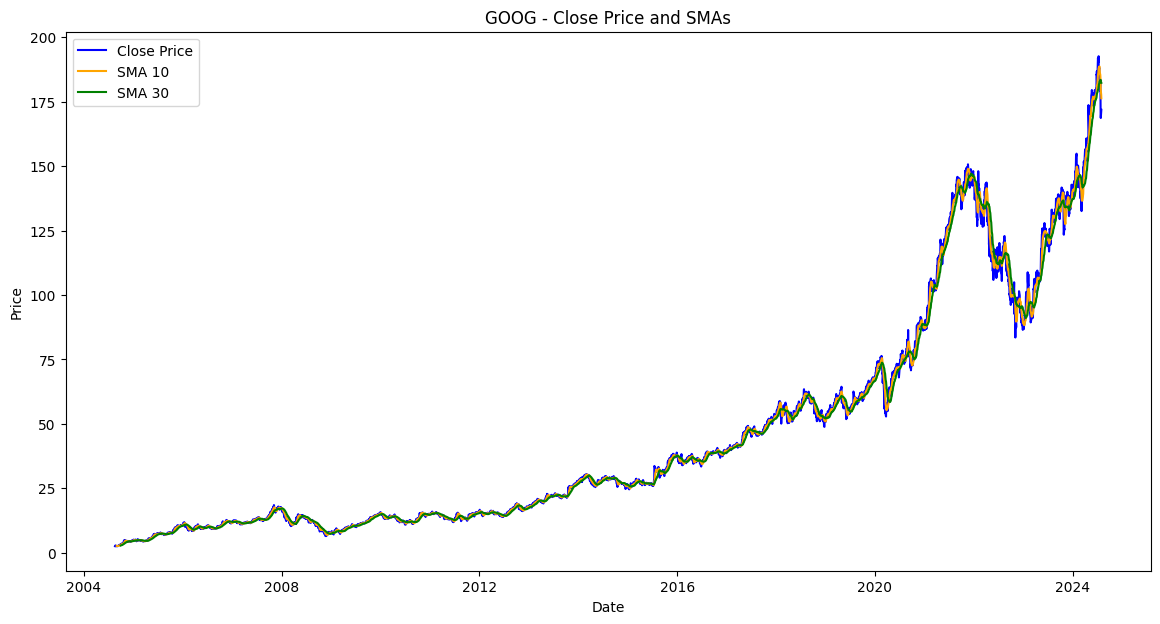

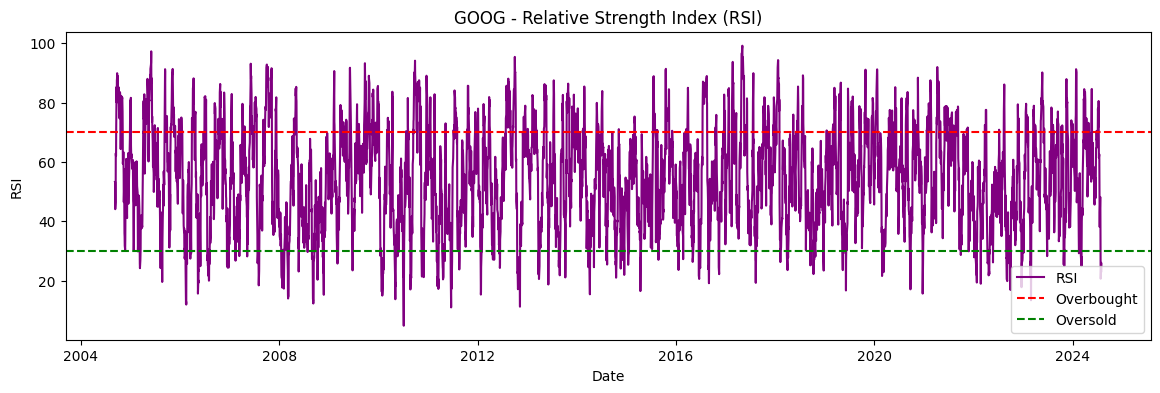

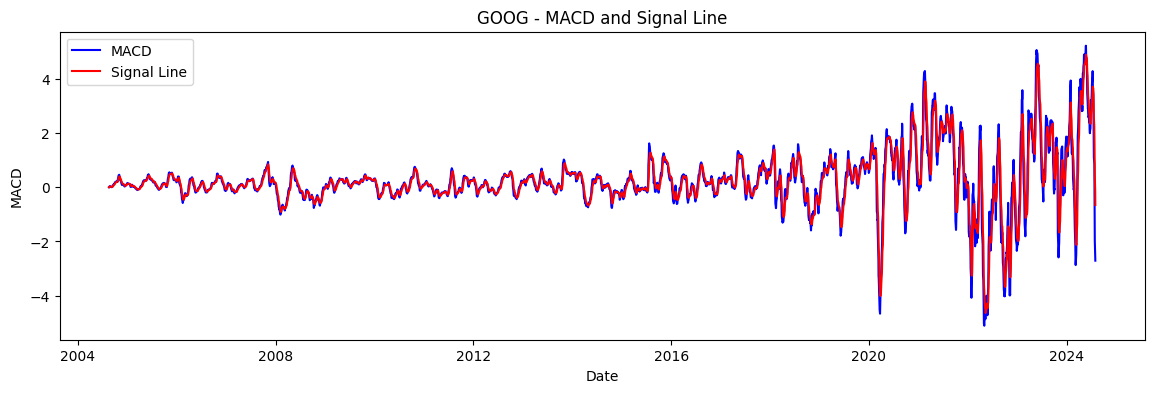

Visualizing data for META


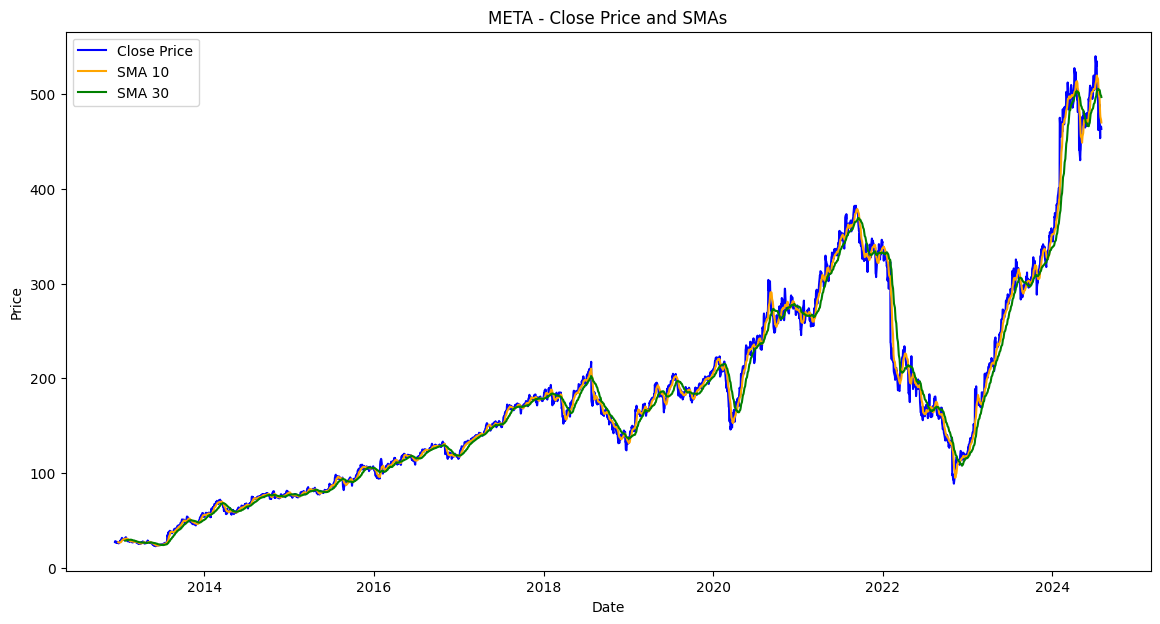

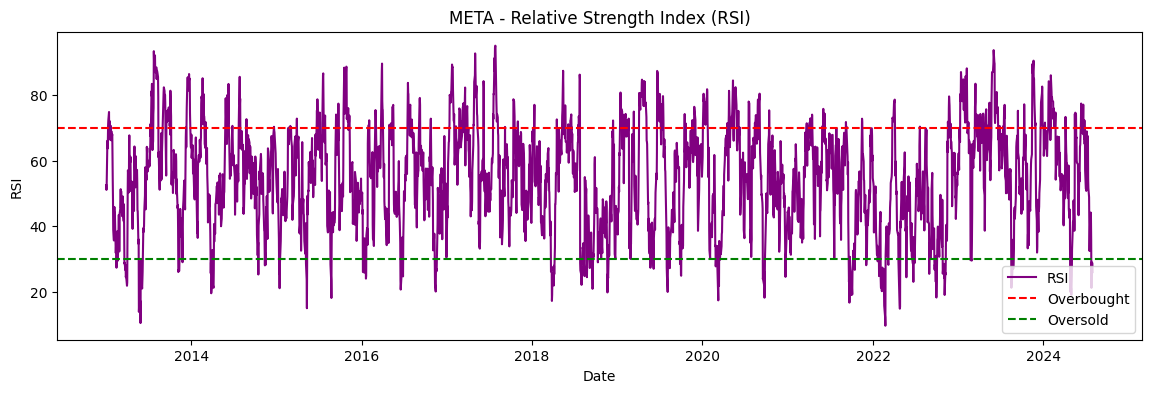

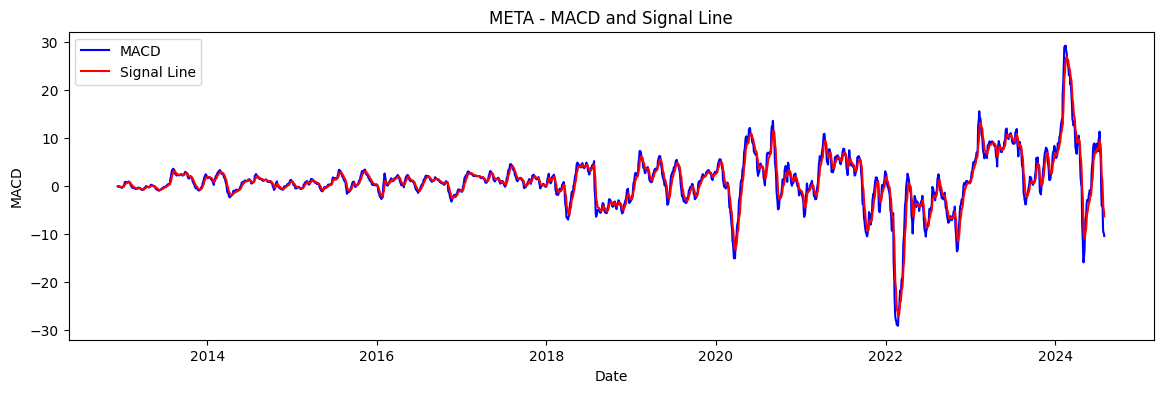

Visualizing data for MSFT


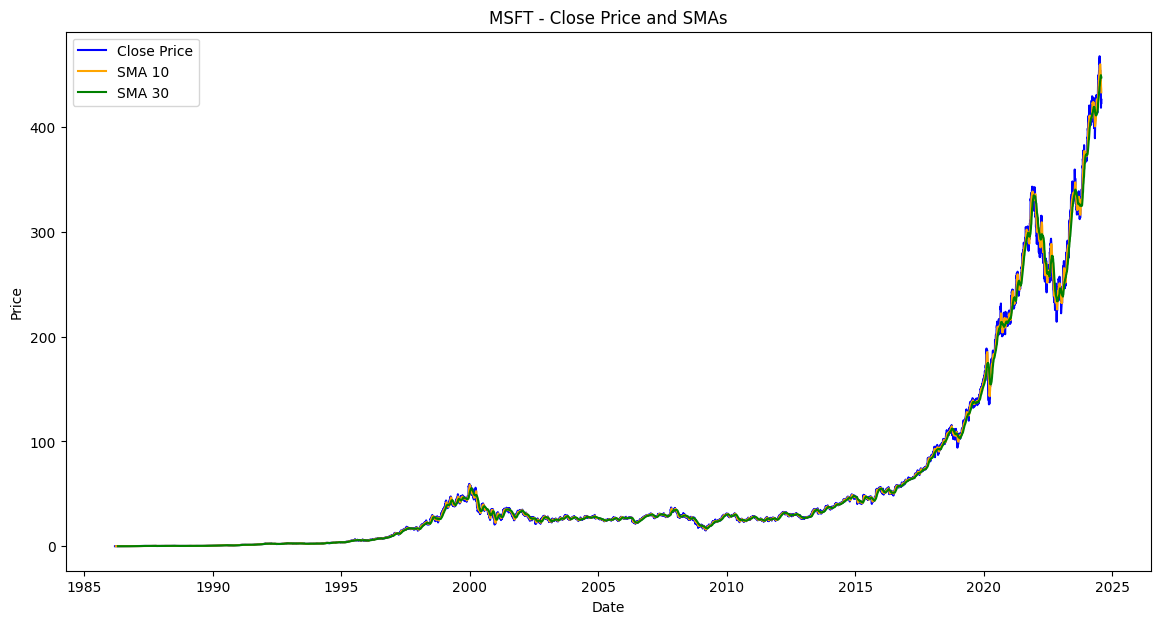

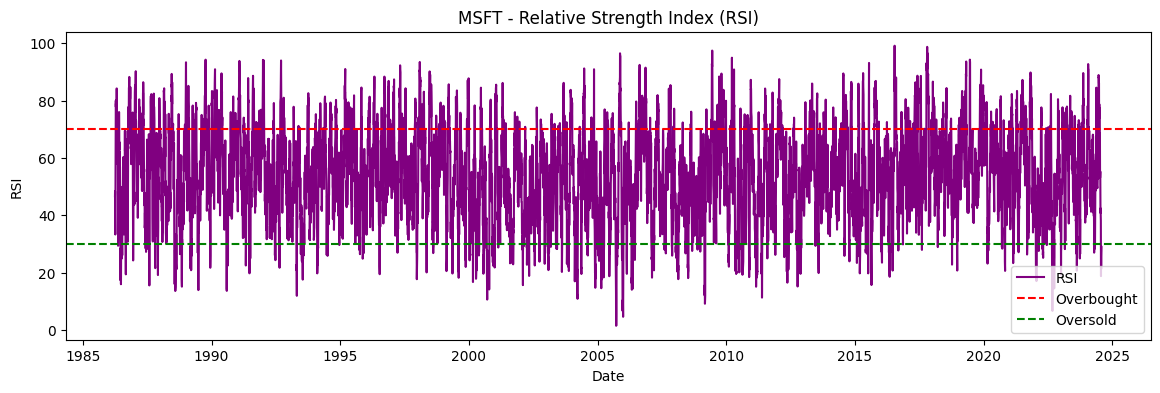

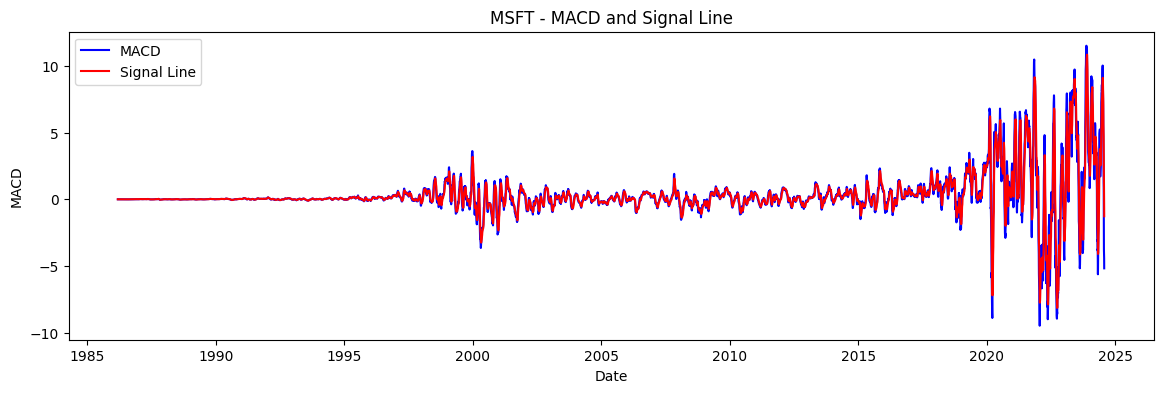

Visualizing data for NVDA


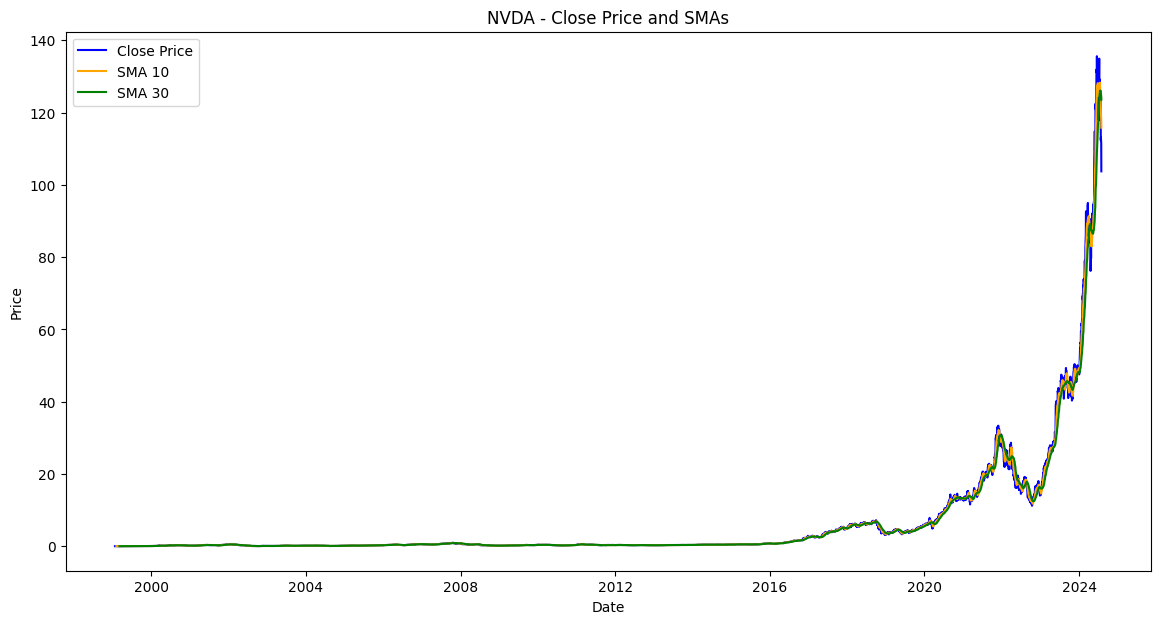

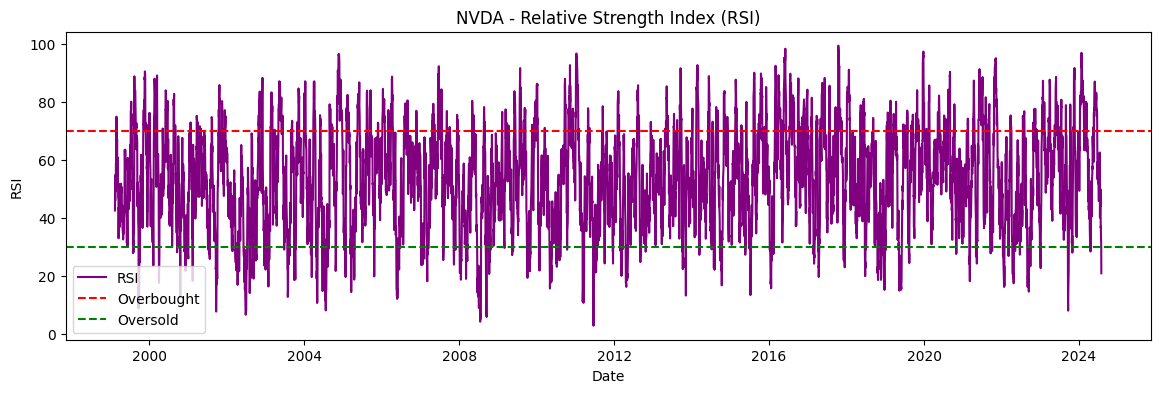

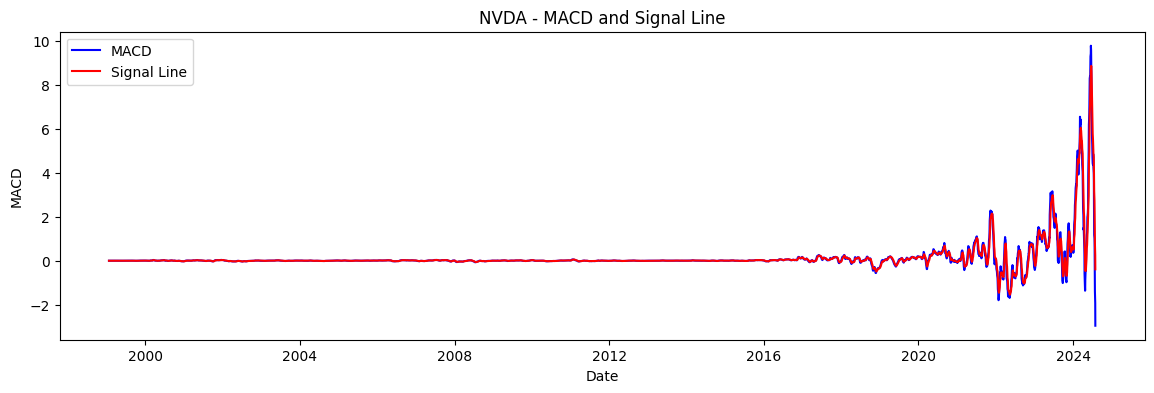

Visualizing data for TSLA


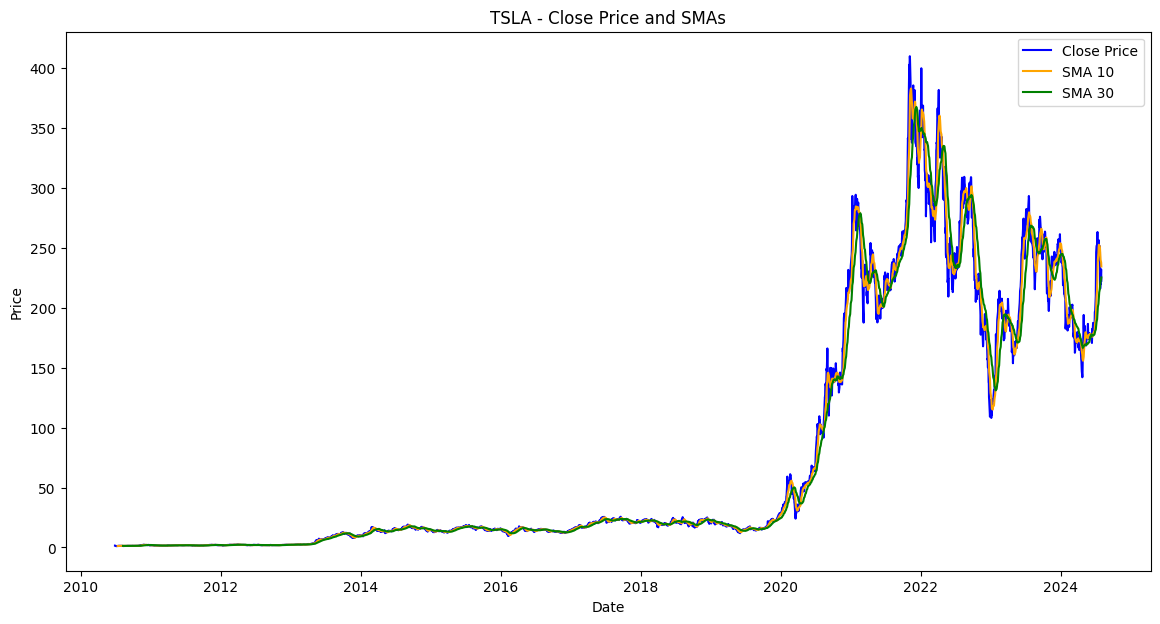

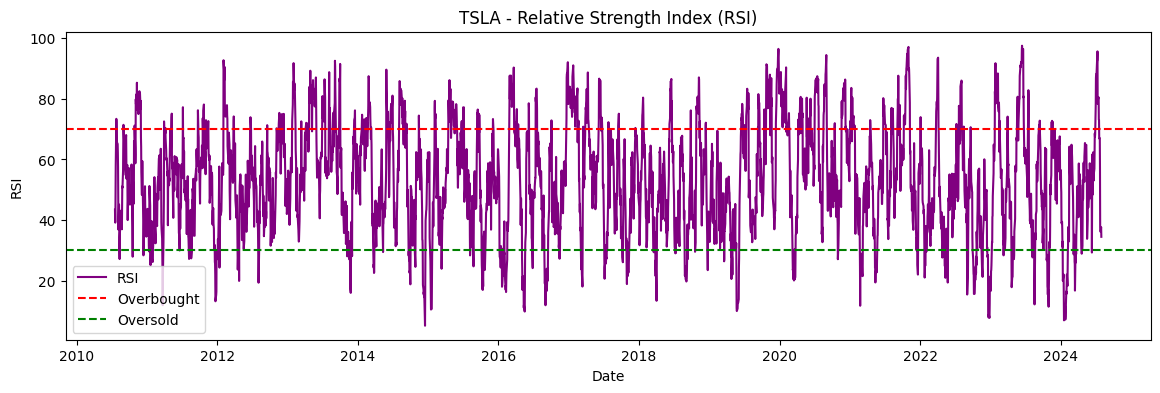

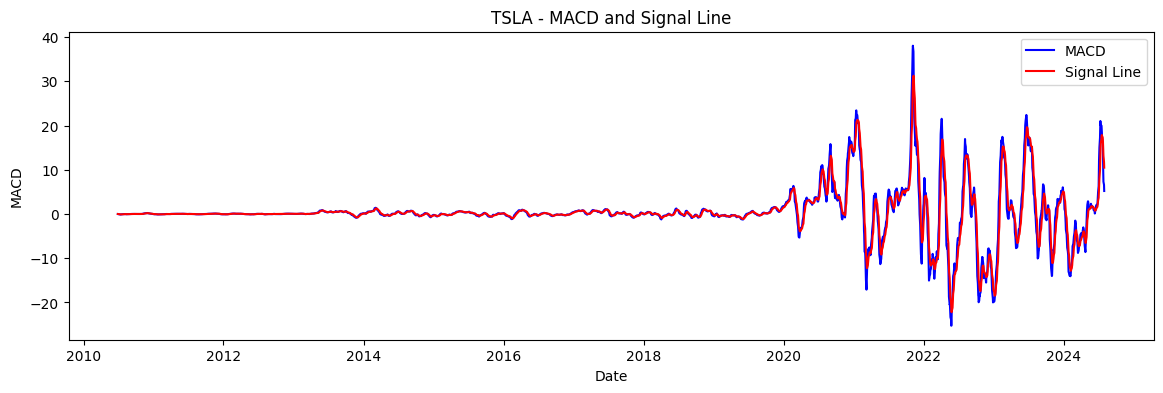

In [9]:
for stock, df in stock_data.items():
    print(f"Visualizing data for {stock}")
    
    # Plot Close price and SMAs
    plt.figure(figsize=(14, 7))
    plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
    plt.plot(df['Date'], df['SMA_10'], label='SMA 10', color='orange')
    plt.plot(df['Date'], df['SMA_30'], label='SMA 30', color='green')
    plt.title(f"{stock} - Close Price and SMAs")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    # Plot RSI
    plt.figure(figsize=(14, 4))
    plt.plot(df['Date'], df['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title(f"{stock} - Relative Strength Index (RSI)")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.show()
    
    # Plot MACD
    plt.figure(figsize=(14, 4))
    plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
    plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='red')
    plt.title(f"{stock} - MACD and Signal Line")
    plt.xlabel("Date")
    plt.ylabel("MACD")
    plt.legend()
    plt.show()
